### <center>Networks<center>

Networks are connected bi-directional graphs. We are interested in:
- the shortest path between two nodes
- connectedness
- centrality
- clustering
- communicability

---
### 1. Construct a network

In [4]:
# import packages
# ! pip install networkx
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# initiation
distances = [['A','B',10],['A','C',5],['A','D',25],['A','E',7],['A','G',12],['B','E',3],['B','G',4],['D','H',5],
             ['D','C',22],['D','E',21],['H','E',35]]
G_C=nx.Graph()
node_labels= {}
nodes = {}

# adding edges
for e in distances:
    G_C.add_edge(e[0],e[1],distance=e[2])

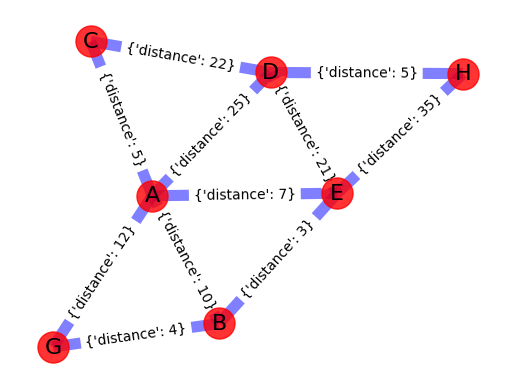

In [89]:
# Visualization
pos=nx.spring_layout(G_C) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_C,pos,node_color='r',node_size=500,alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G_C,pos,edgelist=G_C.edges(),width=8,alpha=0.5,edge_color='b')

node_name={}
for node in G_C.nodes():
    node_name[node]=str(node)

nx.draw_networkx_edge_labels(G_C,pos,font_size=10)
nx.draw_networkx_labels(G_C,pos,node_name,font_size=16)

plt.axis('off')
plt.show() # display

##### Given an address, generate a sorted by distance

In [102]:
location = 'G'
distance_list = list()
for node in G_C.nodes():
    if node == location:
        continue
    if not nx.has_path(G_C,location,node):
        continue
    distance = nx.dijkstra_path_length(G_C,location,node,weight='distance')
    distance_list.append((node,distance))
from operator import itemgetter
print(sorted(distance_list,key=itemgetter(1)))

[('B', 4), ('E', 7), ('A', 12), ('C', 17), ('D', 28), ('H', 33)]


---
### 2. Getting Basic Info of a Network

In [98]:
# info
# basic info
G_C.order() # returns the number of nodes
list(G_C.adjacency()) # adjacent nodes of each node
G_C.degree() # the number of nodes each node connects to
# find_cliques(simple_network) # the subgroups of edges that are connected
G_C.has_edge("A","B") # returns T/F
G_C.has_node(2) # retunrs T/F
G_C.number_of_edges()
G_C.number_of_nodes()
len(G_C) # I would assume this to be the # nodes - 1
G_C.edges(data=True) # the adges that exist
nx.complete_graph(4) # complete graph

# algorithms
nx.shortest_path(G_C,"A","B") # finding the shortest path
nx.shortest_path_length(G_C,"A","B") # finding the length of the shortest path
nx.dijkstra_path(G_C,"A","B",weight='distance')
nx.dijkstra_path_length(G_C,"A","B",weight='distance')
nx.eccentricity(G_C) # Diction of distance
for edge in G_C.edges():
    print(edge,G_C.get_edge_data(*edge))
list(nx.all_simple_paths(G_C,'A','C')) # get all paths from one location to another

False
11
7
('A', 'B') {'distance': 10}
('A', 'C') {'distance': 5}
('A', 'D') {'distance': 25}
('A', 'E') {'distance': 7}
('A', 'G') {'distance': 12}
('B', 'E') {'distance': 3}
('B', 'G') {'distance': 4}
('C', 'D') {'distance': 22}
('D', 'H') {'distance': 5}
('D', 'E') {'distance': 21}
('E', 'H') {'distance': 35}


---
### 3. More Graph Drawing Options

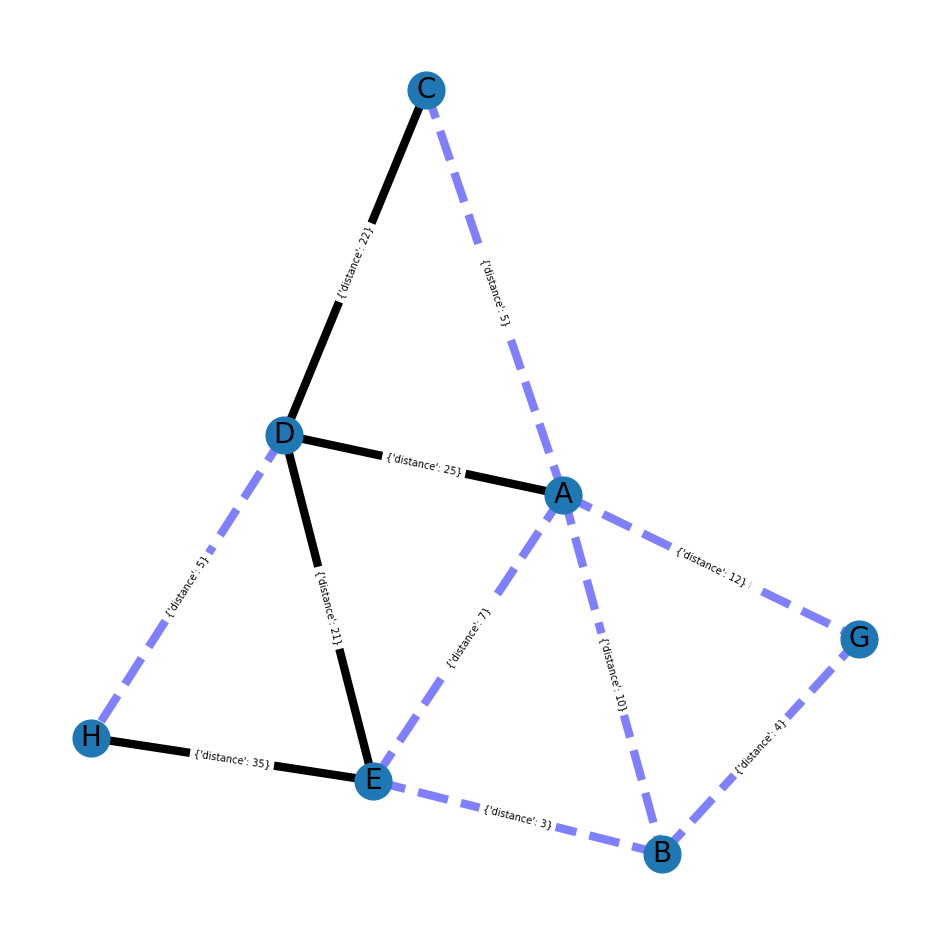

In [99]:
# Differetiating edges by weight

# Divide edges into two groups based on weight
# Easily extendable to n-groups

elarge=[(u,v) for (u,v,d) in G_C.edges(data=True) if d['distance'] > 15]
esmall=[(u,v) for (u,v,d) in G_C.edges(data=True) if d['distance'] <= 15]

pos=nx.spring_layout(G_C) # positions for all nodes
plt.figure(1,figsize=(12,12)) #Let's draw a big graph so that it is clearer

# nodes
nx.draw_networkx_nodes(G_C,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(G_C,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G_C,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G_C,pos,font_size=20,font_family='sans-serif')
nx.draw_networkx_edge_labels(G_C,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
plt.show() # display



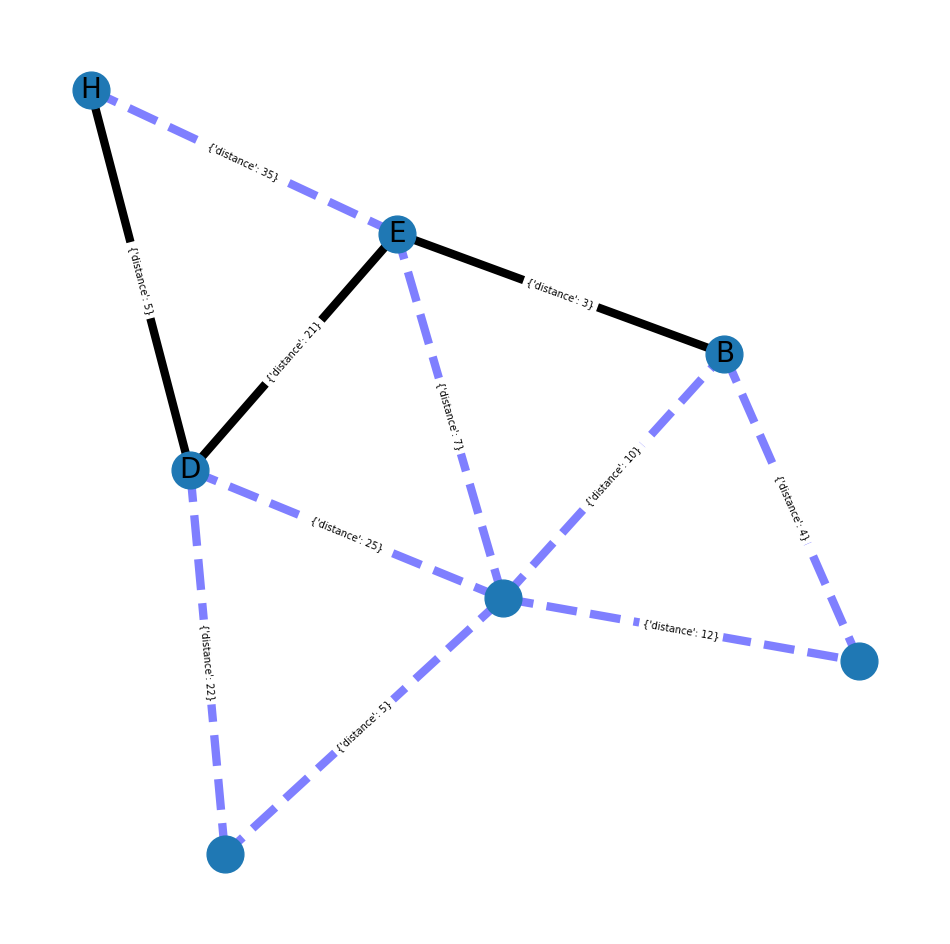

In [100]:
# Highlight the shortest path
origin = 'B'
destination = 'H'
shortest_path = nx.dijkstra_path(G_C,origin,destination,weight='distance')
shortest_path_edges = list()
for i in range(len(shortest_path)-1):
    shortest_path_edges.append((shortest_path[i],shortest_path[i+1]))
    shortest_path_edges.append((shortest_path[i+1],shortest_path[i]))
    
path_edges=list()
other_edges=list()
node_label_list = dict()
node_label_list = {n:'' for n in G_C.nodes()}
for edge in G_C.edges():
    if edge in shortest_path_edges:
        path_edges.append(edge)
        node_label_list[edge[0]] = edge[0]
        node_label_list[edge[1]] = edge[1]
    else:
        other_edges.append(edge)

pos=nx.spring_layout(G_C) # positions for all nodes
fig=plt.figure(1,figsize=(12,12))

# nodes
nx.draw_networkx_nodes(G_C,pos,node_size=700)

# edges. draw the larger weight edges in solid lines and smaller weight edges in dashed lines
nx.draw_networkx_edges(G_C,pos,edgelist=path_edges,
                    width=6)
nx.draw_networkx_edges(G_C,pos,edgelist=other_edges,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels

nx.draw_networkx_labels(G_C,pos,font_size=20,font_family='sans-serif',labels=node_label_list)
nx.draw_networkx_edge_labels(G_C,pos,font_size=7)

plt.axis('off')
#plt.savefig("address_graph.png") # save as png if you need to use it in a report or web app
plt.show() # display


### 3. Network Analysis Algorithms

**Clustering**: a measure of how closely knit the nodes in a graph are. We cab measure the degree to which a node belongs to a cluster (node clustering coefficients) or the degree to which the graph is clustered (graph clustering coefficient).

In [103]:
# node clustering coefficients

print(nx.clustering(G_C))
nx.average_clustering(G_C)

{'A': 0.4,
 'B': 0.6666666666666666,
 'C': 1.0,
 'D': 0.5,
 'E': 0.5,
 'G': 1.0,
 'H': 1.0}

In [109]:
# graph clustering coefficient

print(nx.clustering(G_C,weight='distance'))
nx.average_clustering(G_C,weight='distance')

{'A': 0.12347355351191633, 'B': 0.1311776879533415, 'C': 0.4002913329507696, 'D': 0.2136856015945847, 'E': 0.1752747696873761, 'G': 0.2237067223525065, 'H': 0.44091113830836925}


0.24407440090840912

**Centrality**: deals with identifying the most important nodes in a graph

- **closeness_centrality**: (n-1)/sum(shortest path to all other nodes)

In [113]:
from networkx.algorithms import closeness_centrality
from collections import OrderedDict
c_c = nx.closeness_centrality(G_C,distance='distance') # doesn't have to include distance
cc = OrderedDict(sorted(c_c.items(),key = lambda x: x[1],reverse = True))

- **betweenness_centrality**: fraction of pair shortest paths that pass through node n. Measures of the extent to which a node is connected to other nodes that are not connected to each other. It’s a measure of the degree to which a node serves as a connector Example: a traffic bottleneck

In [116]:
nx.betweenness_centrality(G_C,weight='distance')

{'A': 0.2,
 'B': 0.2,
 'C': 0.0,
 'D': 0.3333333333333333,
 'E': 0.3333333333333333,
 'G': 0.0,
 'H': 0.0}

- degree centrality: fraction of nodes that n is connected to

**Cummunicability**: measures how easy it is to send a message from node i to j
- The sum of all walks from one node to every other node, and this take into account all paths between pairs of nodes. 

In [114]:
from networkx.algorithms import communicability
#G1 = nx.Graph([(0,1),(1,2),(1,5),(5,4),(2,4),(2,3),(4,3),(3,6)])
nx.communicability(G_C)

{'A': {'A': 8.773824255122955,
  'B': 5.938631076344269,
  'C': 4.623176343857768,
  'D': 6.802100927659974,
  'E': 7.066633925283426,
  'G': 4.4521326334548155,
  'H': 3.61761542471073},
 'B': {'A': 5.938631076344269,
  'B': 5.06982441291607,
  'C': 2.529841998921795,
  'D': 4.054917257326451,
  'E': 5.034760299463347,
  'G': 3.603246845233495,
  'H': 2.2910268783084717},
 'C': {'A': 4.623176343857768,
  'B': 2.529841998921795,
  'C': 3.489836682806118,
  'D': 4.18587451124204,
  'E': 3.5183720687095277,
  'G': 1.851999921103433,
  'H': 2.0190146873150034},
 'D': {'A': 6.802100927659974,
  'B': 4.054917257326451,
  'C': 4.18587451124204,
  'D': 6.84829885502844,
  'E': 6.291273616053172,
  'G': 2.700885709324746,
  'H': 4.086631155240832},
 'E': {'A': 7.066633925283426,
  'B': 5.034760299463347,
  'C': 3.5183720687095277,
  'D': 6.291273616053172,
  'E': 7.080009105917386,
  'G': 3.207756593694457,
  'H': 4.126933095345352},
 'G': {'A': 4.4521326334548155,
  'B': 3.603246845233495,
  

**Dispersion** in fully connected graphs

- **Eccentricity**: the max distance from one node to all other nodes (least eccentric is more central)

In [117]:
nx.eccentricity(G_C)

{'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2, 'G': 3, 'H': 3}

- **diameter**: the max eccentricity of all nodes in a graph (the longest shortest path)

In [118]:
nx.diameter(G_C)

3

- **periphery**: the set of nodes with eccentricity = diameter

In [119]:
nx.periphery(G_C)

['G', 'H']